**Данные**:
1 - возраст
2 - тип работы
3 - семейное положение
4 - образование
5 - есть кредит?
6 - есть жилищный кредит?
7 - есть потребительский кредит?

**Связано с последней рекламной кампанией**:
8 - тип связи с клиентом
9 - месяц последего контакта
10 - день недели последнего контакта
11 - длительность последнего контакта
*!Этот атрибут сильно влияет на цель вывода (например, если duration=0, то y="no"). Тем не менее, продолжительность не известна до выполнения вызова. Кроме того, после окончания вызова y, очевидно, известен. Таким образом, эти входные данные должны быть включены только для целей сравнительного анализа и должны быть отброшены, если намерение состоит в том, чтобы иметь реалистичную прогностическую модель.*
12 - кампания: количество контактов, выполненных во время этой кампании и для этого клиента (включая последний контакт)
13 - pdays: количество дней, прошедших с момента последнего контакта с клиентом из предыдущей кампании (999 означает, что с клиентом ранее не связывались)
14 - количество контактов, выполненных до этой кампании и для этого клиента
15 - результат предыдущей маркетинговой кампании

**Соц-эк показатели:**
16 - коэффициент изменения занятости - квартальный индикатор
17 - индекс потребительских цен - месячный индикатор
18 - индекс доверия потребителей - месячный индикатор
19 - трехмесячная ставка euribor - дневной индикатор
*Европейская межбанковская ставка предложения — усреднённая процентная ставка по межбанковским кредитам, предоставляемым в евро.*
20 - количество работников - квартальный показатель

**Результат**:
21 - клиент оформил срочный вклад?

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('drive/MyDrive/bank-additional-full.csv', sep = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [70]:
df.info()

#изучаем данные. на будущее видим, что в наборе данных нет пропущенных значений. в основном все данные - строки.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [71]:
df.describe(include = ['object', 'number'])

#смотрим показатели по всем видам ячеек: как числовых, так и тестовых

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [72]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [73]:
df_rename = ['возраст', 'работа', 'семейное положение', 'образование', 'кредит', 'жил кредит', 'потр кредит', 'тип конт', 'мес посл конт',
          'день посл конт', 'длит посл конт', 'кол-во конт', 'дни с посл конт ДО', 'кол-во конт ДО', 'рез-т ДО', 'коэф изм занят',
          'инд потр цен', 'инд довер потр', 'euribor', 'кол-во работн', 'срочн вклад']

#переименовываем колонки, изначально обозначая лист новых названий. ДО - показатели, полученные до текущей кампании

In [74]:
df.columns = df_rename
df

#переименовывем прошлые названия на новые, определенные выше

,возраст,работа,семейное положение,образование,кредит,жил кредит,потр кредит,тип конт,мес посл конт,день посл конт,...,кол-во конт,дни с посл конт ДО,кол-во конт ДО,рез-т ДО,коэф изм занят,инд потр цен,инд довер потр,euribor,кол-во работн,срочн вклад
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#Подготовка данных
######Группировка


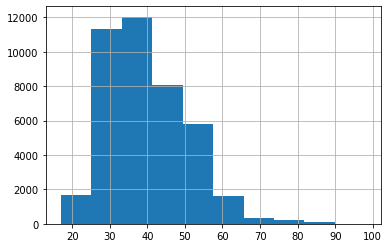

In [75]:
#начнем группировать по порядку те данные, в которых нам более интересно посмотреть на группу людей, объединенных показателем,
#нежели на единичые случаи

df['возраст'].hist()

#начинаем с возраста. знакомимся с данными через гистограмму. plt для работы выводили в самом начале.

In [76]:
#видим, что преобладает возраст 30-50, значит, нужно взять шаг меньше, чтобы было +- равномерное распределени по группам.
#поделим на группы по 10, начиная с 30, так как до 30 численность незначительная

def age_cat(age):
  if age < 30:
    return 'до 30'
  elif age < 40:
    return 'от 30 до 40'
  elif age < 50:
    return 'от 40 до 50'
  elif age < 60:
    return 'от 50 до 60'
  elif age >= 60:
    return 'от 60'
  else:
    return age

In [77]:
df['возраст'].apply(age_cat)

#применяем распределение по группам к нашему столбцу с возрастом

0        от 50 до 60
1        от 50 до 60
2        от 30 до 40
3        от 40 до 50
4        от 50 до 60
            ...     
41183          от 60
41184    от 40 до 50
41185    от 50 до 60
41186    от 40 до 50
41187          от 60
Name: возраст, Length: 41188, dtype: object

In [78]:
df['возраст'] = df['возраст'].apply(age_cat)

#меняем столбец "возраст"с единичными значениями на категориальные 

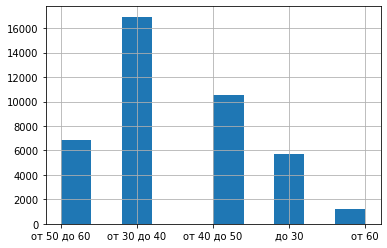

In [79]:
df['возраст'].hist()


#смотрим распределение. хотим посмотреть график, расположенный по названиям

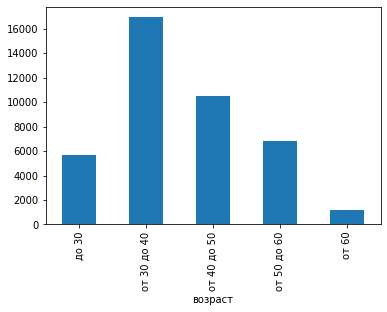

In [80]:
df.groupby('возраст').size().plot(kind = 'bar')

#сортируем данные по алфавиту, чтобы увидеть распределение групп по возрастанию возраста

In [81]:
df['образование'].unique()

#изучаем, какие есть варианты в категории "образование"

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [82]:
#собираем все базовое образование в показатель "базовое образование", так как настолько детализация нам не важна

df['образование'] = np.where (df['образование'] =='basic.9y','Basic', df['образование'])
df['образование']  =np.where (df['образование'] =='basic.6y','Basic', df['образование'])
df['образование'] = np.where (df['образование'] =='basic.4y','Basic', df['образование'])



In [83]:
#проверяем существующие группы образования

df['образование'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [84]:
#далее можно объединить все кредиты (обычный, жилищный, потребительский), суммировав их. для этого 'no' заменим на 0, 'yes' на 1,
#а 'unknown' на False (чтобы при суммировании он не учитывал значение)

df['кредит'] = np.where (df['кредит'] == 'no', 0, df['кредит'])
df['кредит'] = np.where (df['кредит'] == 'yes', 1, df['кредит'])
df['кредит'] = np.where (df['кредит'] == 'unknown', False, df['кредит'])

df['жил кредит'] = np.where (df['жил кредит'] == 'no', 0, df['жил кредит'])
df['жил кредит'] = np.where (df['жил кредит'] == 'yes', 1, df['жил кредит'])
df['жил кредит'] = np.where (df['жил кредит'] == 'unknown', False, df['жил кредит'])

df['потр кредит'] = np.where (df['потр кредит'] == 'no', 0, df['потр кредит'])
df['потр кредит'] = np.where (df['потр кредит'] == 'yes', 1, df['потр кредит'])
df['потр кредит'] = np.where (df['потр кредит'] == 'unknown', False, df['потр кредит'])

df.head()

,возраст,работа,семейное положение,образование,кредит,жил кредит,потр кредит,тип конт,мес посл конт,день посл конт,...,кол-во конт,дни с посл конт ДО,кол-во конт ДО,рез-т ДО,коэф изм занят,инд потр цен,инд довер потр,euribor,кол-во работн,срочн вклад
0,от 50 до 60,housemaid,married,Basic,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,от 50 до 60,services,married,high.school,False,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,от 30 до 40,services,married,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,от 40 до 50,admin.,married,Basic,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,от 50 до 60,services,married,high.school,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [85]:
#теперь ячейки можно суммировать и  проверить. сразу вставим столбец в нужное место, внутри функции 'insert' суммировав необходимые функции

df.insert(7, 'кол-во кредитов', df['жил кредит'] +df['кредит'] + df['потр кредит'])

df.head()

,возраст,работа,семейное положение,образование,кредит,жил кредит,потр кредит,кол-во кредитов,тип конт,мес посл конт,...,кол-во конт,дни с посл конт ДО,кол-во конт ДО,рез-т ДО,коэф изм занят,инд потр цен,инд довер потр,euribor,кол-во работн,срочн вклад
0,от 50 до 60,housemaid,married,Basic,0,0,0,0,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,от 50 до 60,services,married,high.school,False,0,0,0,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,от 30 до 40,services,married,high.school,0,1,0,1,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,от 40 до 50,admin.,married,Basic,0,0,0,0,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,от 50 до 60,services,married,high.school,0,0,1,1,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


######Перекодирование столбцов

In [86]:
#перекодируем в бинарный столбец "срочн вклад", который и являлся основной целью маркетинговой кампании
#то есть, нам важно понять, был ли оформлен вклад, который рекламировался. так как в данном случае будет только 2 варианта 'yes' и 'no',
#то можно перекодировать толбец с помощью лямбды

In [87]:
#еще раз проверим, что в столбце только 2 варианта ответа

df['срочн вклад'].unique()

array(['no', 'yes'], dtype=object)

In [88]:
#перекодируем столбец на бинарный (0 = no, 1 = yes), проверив работу и перезаписав его вместо него самого

df['срочн вклад'] = df['срочн вклад'].apply(lambda x: 1 if x == 'yes' else 0)
df['срочн вклад'].unique()

array([0, 1])

In [89]:
df.head()

,возраст,работа,семейное положение,образование,кредит,жил кредит,потр кредит,кол-во кредитов,тип конт,мес посл конт,...,кол-во конт,дни с посл конт ДО,кол-во конт ДО,рез-т ДО,коэф изм занят,инд потр цен,инд довер потр,euribor,кол-во работн,срочн вклад
0,от 50 до 60,housemaid,married,Basic,0,0,0,0,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,от 50 до 60,services,married,high.school,False,0,0,0,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,от 30 до 40,services,married,high.school,0,1,0,1,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,от 40 до 50,admin.,married,Basic,0,0,0,0,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,от 50 до 60,services,married,high.school,0,0,1,1,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


######Удаление столбцов

In [90]:
#есть колонки, которые не добавляют ценной информации для анализа. Например, трехмесячная ставка euribor.
#Это показатель именно для Европейского рынка мы не знаем особенности этого показателя и в данном случае, для анализа аудитории банка
#и результативно маркетинговой кампании, данный показатель можно убрать. 

del df['euribor']

In [91]:
#проверяем, что колонка удалилась

df.head()

,возраст,работа,семейное положение,образование,кредит,жил кредит,потр кредит,кол-во кредитов,тип конт,мес посл конт,...,длит посл конт,кол-во конт,дни с посл конт ДО,кол-во конт ДО,рез-т ДО,коэф изм занят,инд потр цен,инд довер потр,кол-во работн,срочн вклад
0,от 50 до 60,housemaid,married,Basic,0,0,0,0,telephone,may,...,261,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,0
1,от 50 до 60,services,married,high.school,False,0,0,0,telephone,may,...,149,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,0
2,от 30 до 40,services,married,high.school,0,1,0,1,telephone,may,...,226,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,0
3,от 40 до 50,admin.,married,Basic,0,0,0,0,telephone,may,...,151,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,0
4,от 50 до 60,services,married,high.school,0,0,1,1,telephone,may,...,307,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,0


#Ответы на вопросы

######**1. Портрет аудитории последней маркетинговой кампании банка**

In [92]:
#чтобы изучить аудиторию маркетинговой кампании, мы будем смотреть на: возраст, должность, семейное положение, образование, количество кредитов, преобладающий тип кредита
#для этого можно использовать функцию describe. значение 'top' покажет наиболее часто встречающееся значение

df.describe(include = ['object', 'number'])

#Вывод: средний портрет аудитории (те, с кем наиболее часто связывались) последней маркетинговой кампании: человек 30-40 лет, в административной должности, женат/замужем, с базовым образованием и одним кредитом. 
#Чтобы иметь более глубокое представление о распределении данных, описывающих аудиторию, далее рассмотрим каждый показатель в отдельности. Возможно, немного расширим описание аудитории последней марк кампании банка.

,возраст,работа,семейное положение,образование,кредит,жил кредит,потр кредит,кол-во кредитов,тип конт,мес посл конт,...,длит посл конт,кол-во конт,дни с посл конт ДО,кол-во конт ДО,рез-т ДО,коэф изм занят,инд потр цен,инд довер потр,кол-во работн,срочн вклад
count,41188,41188,41188,41188,41188.0,41188.0,41188.0,41188.0,41188,41188,...,41188.000000,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
unique,5,12,4,6,2.0,2.0,2.0,3.0,2,10,...,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,от 30 до 40,admin.,married,Basic,0.0,1.0,0.0,1.0,cellular,may,...,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN
freq,16938,10422,24928,12513,41185.0,21576.0,34940.0,20443.0,26144,13769,...,NaN,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,258.285010,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,5167.035911,0.112654
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,259.279249,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,72.251528,0.316173
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,4963.600000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,102.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,5099.100000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,180.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,5191.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,319.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,5228.100000,0.000000


1. Возраст

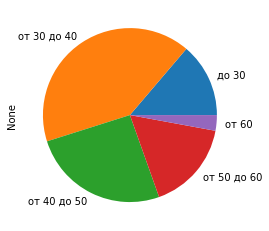

In [93]:
df.groupby('возраст').size().plot(kind = 'pie')

#действительно преобладает возраст от 30 до 40. на втором месте - возраст от 40 до 50 лет. 
#Это может быть связано с тем, что люди до 30 имеют меньшую стабильность и кредитную историю, поэтому они не берут кредиты, либо им их не дают. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


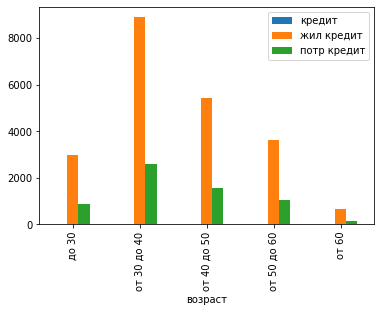

In [94]:
#также можно посмотреть распределение по возрасту для каждого кредита конкретно

df.groupby('возраст')['кредит', 'жил кредит', 'потр кредит'].sum().plot(kind = 'bar')

#во-первых, график подтверждает наш вывод о том, что чаще всего кредит берут в возрасте от 30 до 40
#во-вторых, с помощью этих более детельных данных можно сделать вывод о том, что в период 30-40 лет преобладает
#жилищный кредит (= ипотека), и, в целом, для других возрастов ипотека более популярна, нежели потребительский кредит или общий кредит. 

2. Работа (должность)

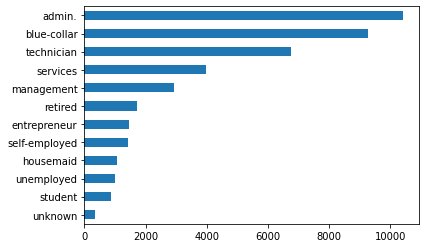

In [95]:
#используем не groupby для графика, а идем через DataFrame, чтобы была возможность использовать value_counts и расположить график
#в порядке убывания

df['работа'].value_counts(ascending=True).plot(kind = 'barh')

#на первом месте административные должности, на втором - "синие воротнички" (рабочие специальности), на третьем - технические

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


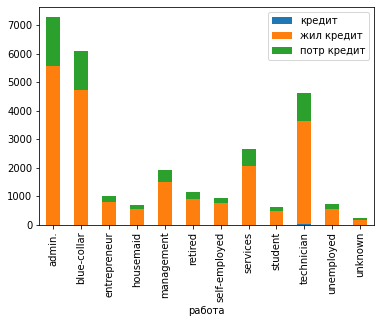

In [96]:
#также можно визуализировать более детально, посмотреть распределение кредитов по должности
#в данном случае визуализируем через stacked, так как должностей много и будет визуально компактее, если кредиты будут не рядом, а друг на друге

df.groupby('работа')['кредит', 'жил кредит', 'потр кредит'].sum().plot(kind = 'bar', stacked = True)

3. Образование

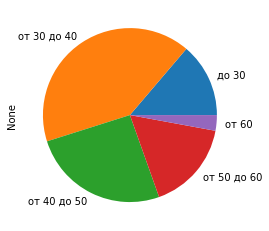

In [97]:
df.groupby('возраст').size().plot(kind = 'pie')

#как и описывалось ранее, преобладает в датасете чаще всего возраст от 30 до 40. Однако, надо учесть, что, возможно, выборка была смещена и делать вывод о том, что кредит действительно берут 
#чаще всего в возрасте 30-40, нельзя

In [98]:
#проверяем распределение по возрасту и видим, что действительно категории представлены неравномерно: преобладают опрашиваемые в возрасте 30-50, поэтому делать выводы на основе данного датасета до 
#нормализации данных нерационально
df['возраст'].value_counts()

от 30 до 40    16938
от 40 до 50    10526
от 50 до 60     6862
до 30           5669
от 60           1193
Name: возраст, dtype: int64

######**2. Взаимозависимость показателей реализации маркетинговой кампании (длительность, количество), коэффициентов (изменение занятости, индекс потребительских цен, и тд) и результата маркетинговой кампании (оформление срочного вклада)**

In [99]:
#строим корреляционную матрицу, сразу округляя до двух чисел после запятой 

corr_m = df.corr().round(2)
corr_m

#воспринимать такую таблицу сложно, поэтому визуализируем ее 

,длит посл конт,кол-во конт,дни с посл конт ДО,кол-во конт ДО,коэф изм занят,инд потр цен,инд довер потр,кол-во работн,срочн вклад
длит посл конт,1.00,-0.07,-0.05,0.02,-0.03,0.01,-0.01,-0.04,0.41
кол-во конт,-0.07,1.00,0.05,-0.08,0.15,0.13,-0.01,0.14,-0.07
дни с посл конт ДО,-0.05,0.05,1.00,-0.59,0.27,0.08,-0.09,0.37,-0.32
кол-во конт ДО,0.02,-0.08,-0.59,1.00,-0.42,-0.20,-0.05,-0.50,0.23
коэф изм занят,-0.03,0.15,0.27,-0.42,1.00,0.78,0.20,0.91,-0.30
инд потр цен,0.01,0.13,0.08,-0.20,0.78,1.00,0.06,0.52,-0.14
инд довер потр,-0.01,-0.01,-0.09,-0.05,0.20,0.06,1.00,0.10,0.05
кол-во работн,-0.04,0.14,0.37,-0.50,0.91,0.52,0.10,1.00,-0.35
срочн вклад,0.41,-0.07,-0.32,0.23,-0.30,-0.14,0.05,-0.35,1.00


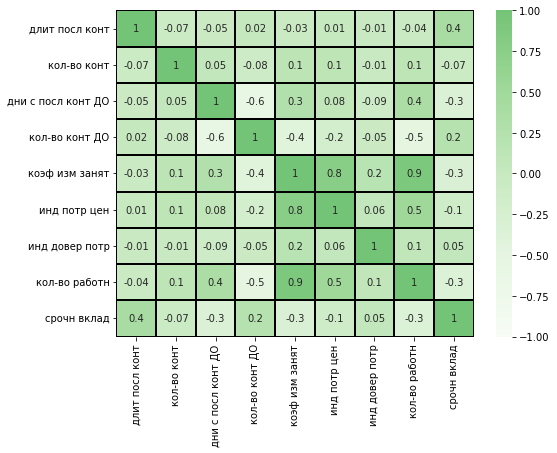

In [100]:
import seaborn as sns
plt.figure(figsize = (8,6))
matrix = np.triu(corr_m)
sns.heatmap(corr_m, annot = True,
            center = 1,
            linecolor = 'black',
            linewidth = 1,
            annot_kws = {'size':10},
            cmap = 'Greens',
            vmax = 1,
            vmin = -1,
            fmt = '.1g')

#по таблице мы видим, что для срочного вклада нет сильных значимых коэффициентов корреляции
#средней силы связь (r=0.4-0.7) есть между оформлением срочного вклада и длительностью последнего контакта
#так как коэффициент положительный, получается, что, чем длиннее был контакт, тем больше была вероятность, что человек откроет срочный вклад
#это логично, так как за более долгий разговор звонящий может закрыть большее количество возражений клиента и оформить по телефону вклад

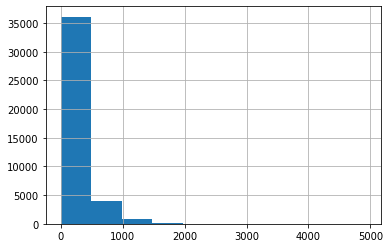

In [101]:
df['длит посл конт'].hist()

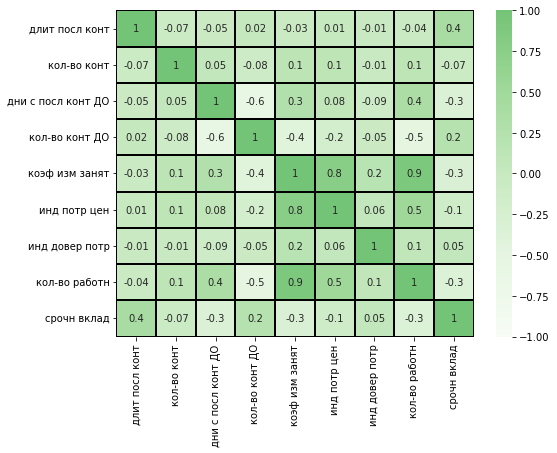

In [102]:
import seaborn as sns
plt.figure(figsize = (8,6))
matrix = np.triu(corr_m)
sns.heatmap(corr_m, annot = True,
            center = 1,
            linecolor = 'black',
            linewidth = 1,
            annot_kws = {'size':10},
            cmap = 'Greens',
            vmax = 1,
            vmin = -1,
            fmt = '.1g')

#также можно обратить внимание на коэф корреляции -0.3 для трех показателей: дни с посл контакта до, коэффициент изменения занятости и кол-во работников
#к сожалению, в датасете не было пояснения, что подразумевается под количеством работников и коэффициентом измнения занятости, поэтому будет делать вывод только по показателю
#"дни с последнего контакта ДО" - это показатель, показывающий, сколько прошло дней с последнего контакта с человеком до анализируемой рекламной кампании 
#коэф корреляции -0.3 показывает, что связь слабая и отрицательная. мы могли бы сделать вывод о том, что чем меньше дней с последнего контакта было до, тем выше вероятность 
#открытия срочного вклада. это звучит логично, так как пользователь еще не забыл о банке и, скорее всего, будет заинтересован в его услугах. 
#однако, далее мы увидим, что распределение показателя "дни с последнего контакта ДО" очень неравномерное. напомню, что 999 означает, что раньше с пользователем не связывались. 
#медиана = 962. то есть, данные сильно смещены: в большинстве случаев мы не связывались с пользователями до текущей кампании
#поэтому мы не можем делать обоснованный вывод о корреляции между днями с последнего контакта предыдущей маркетинговой кампании и открытием срочного вклада. 

In [103]:
#попробуем заменить 999 до 0 и посмотреть, повиляло ли это на корреляцию

df['дни с посл конт ДО'] = df.loc[df['дни с посл конт ДО'] == 999, 'дни с посл конт ДО'] = 0
df.head()

,возраст,работа,семейное положение,образование,кредит,жил кредит,потр кредит,кол-во кредитов,тип конт,мес посл конт,...,длит посл конт,кол-во конт,дни с посл конт ДО,кол-во конт ДО,рез-т ДО,коэф изм занят,инд потр цен,инд довер потр,кол-во работн,срочн вклад
0,от 50 до 60,housemaid,married,Basic,0,0,0,0,telephone,may,...,261,1,0,0,nonexistent,1.1,93.994,-36.4,5191.0,0
1,от 50 до 60,services,married,high.school,False,0,0,0,telephone,may,...,149,1,0,0,nonexistent,1.1,93.994,-36.4,5191.0,0
2,от 30 до 40,services,married,high.school,0,1,0,1,telephone,may,...,226,1,0,0,nonexistent,1.1,93.994,-36.4,5191.0,0
3,от 40 до 50,admin.,married,Basic,0,0,0,0,telephone,may,...,151,1,0,0,nonexistent,1.1,93.994,-36.4,5191.0,0
4,от 50 до 60,services,married,high.school,0,0,1,1,telephone,may,...,307,1,0,0,nonexistent,1.1,93.994,-36.4,5191.0,0


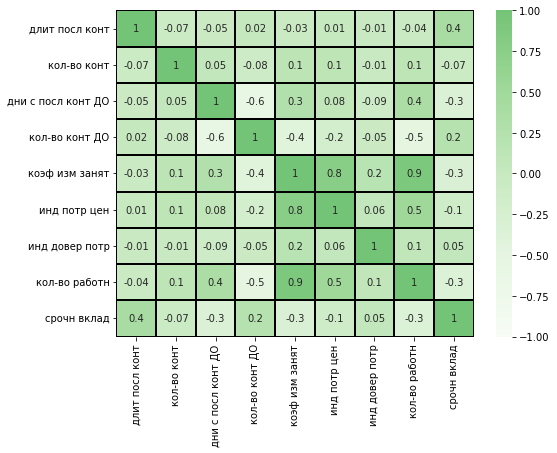

In [104]:
import seaborn as sns
plt.figure(figsize = (8,6))
matrix = np.triu(corr_m)
sns.heatmap(corr_m, annot = True,
            center = 1,
            linecolor = 'black',
            linewidth = 1,
            annot_kws = {'size':10},
            cmap = 'Greens',
            vmax = 1,
            vmin = -1,
            fmt = '.1g')

#как оказалось, это не повлияло на корреляцию и мы можем сделать вывод о том, что чем меньше дней с последнего контакта было до, тем выше вероятность 
#открытия срочного вклада.

In [105]:
df['дни с посл конт ДО'].mean()

0.0

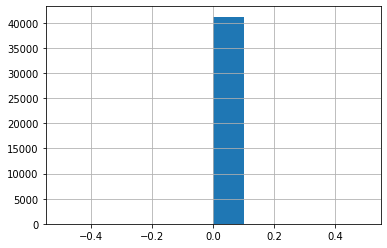

In [106]:
df['дни с посл конт ДО'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

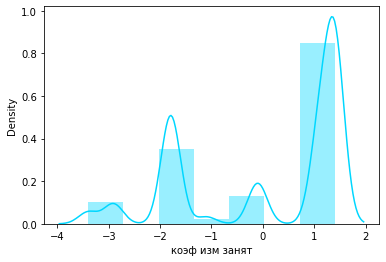

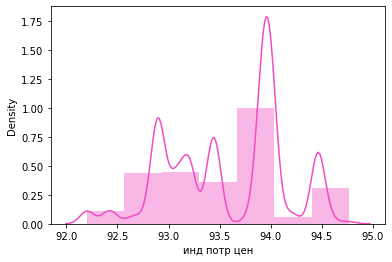

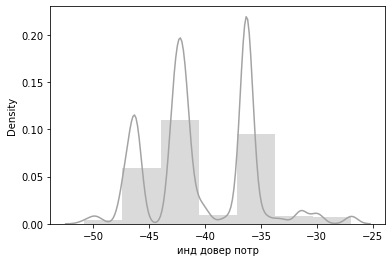

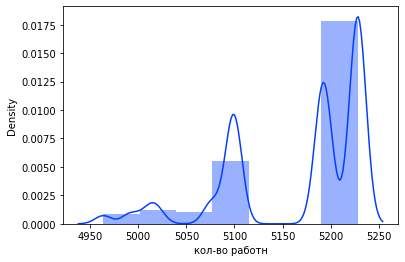

In [107]:
#для продвинутой визуализации можно использовать гистограммы, взять именно количественные переменные

import random 

palette = sns.color_palette("bright")
for col in df.select_dtypes('float64'):
    
    plt.figure()
    sns.distplot(df[col], bins=7, color= random.choice(palette))

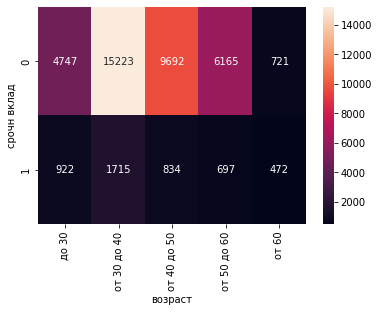

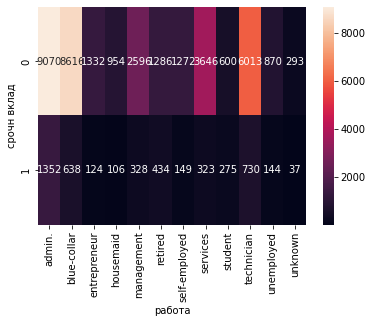

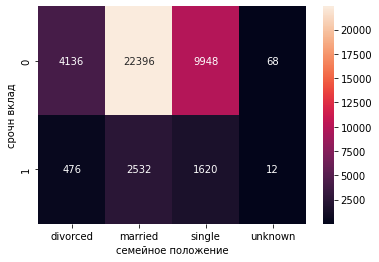

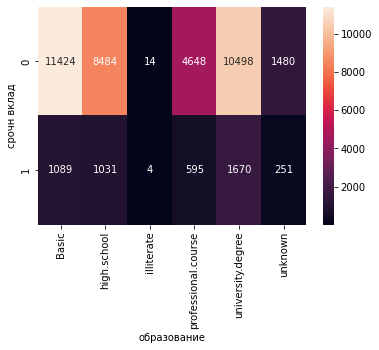

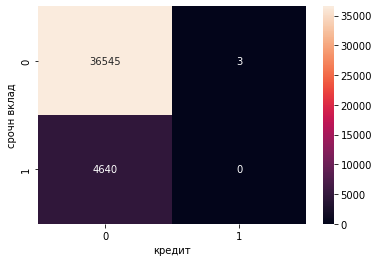

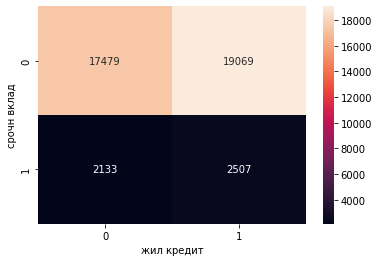

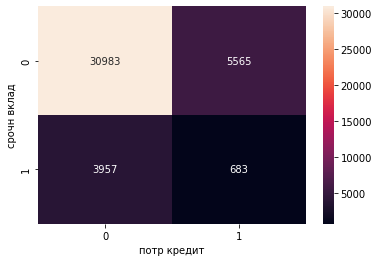

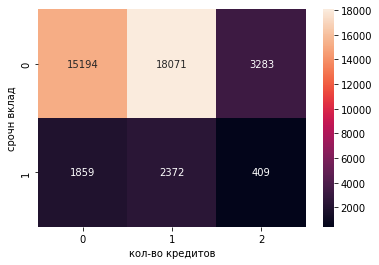

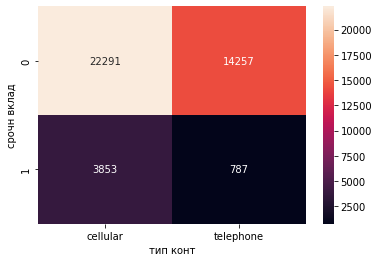

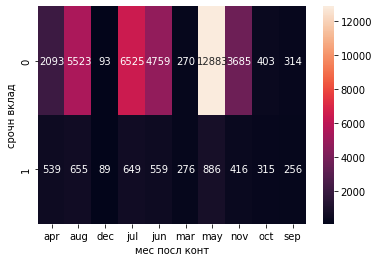

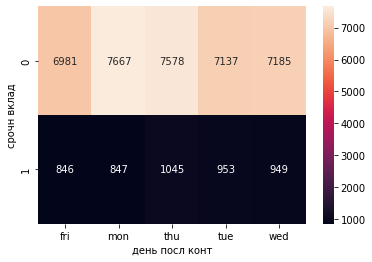

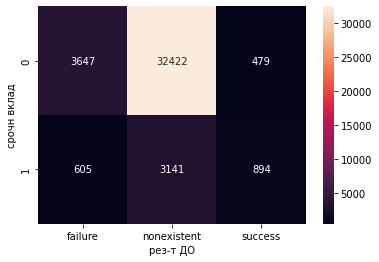

In [108]:
#также можно посмотреть распределение тех, кто оформил срочный вклад, по разным показателям: как связывались, кв какой месяц или день, какого возраста. 
#посмотроим для этого диаграммы, в которых отразим распределение результата открытия срочного вклада (да/нет) по покзаатлям (возраст/тип связи и тд)

for col in  df.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(df['срочн вклад'], df[col]), annot=True, fmt = 'd')

Таким образом, можно сделать вывод о том, что срочный вклад чаще оформляли:


*   люди в возрасте от 30 до 40
*   административных должностей
*   в браке
*   с высшим образованием
*   без обычного кредита
*   с ипотекой
*   с потребительким кредитом
*   в целом с одним кредитом
*   те, с кем общались по мобильному
*   те, кому звонили в мае/во четверг
*   те, кто раньше вообще не имел дел с банком (не использовал услуги, и даже не пытался/не пытались ему продать их)





